C:\Users\Admin\AppData\Local\Temp\ipykernel_21716\3887434938.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(1,1))


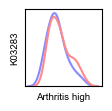

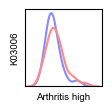

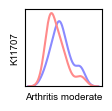

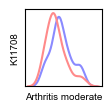

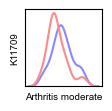

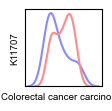

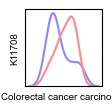

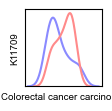

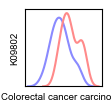

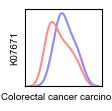

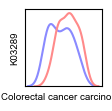

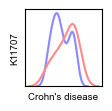

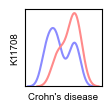

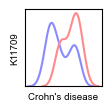

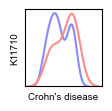

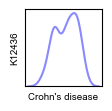

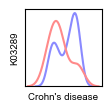

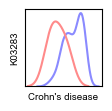

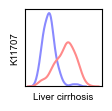

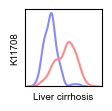

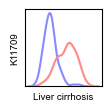

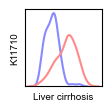

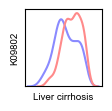

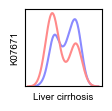

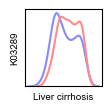

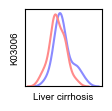

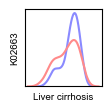

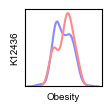

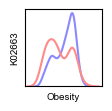

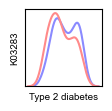

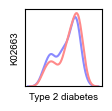

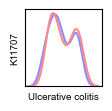

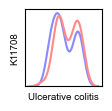

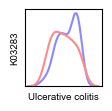

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'

gene_list=['K11707','K11708','K11709','K11710','K12436','K09802','K07671','K03289','K03283','K03006','K02663']
Disease_list=['Arthritis_High','Arthritis_Moderate','ColorectalCancer_AdvancedAdenoma','ColorectalCancer_Carcinoma','CrohnsDisease','LiverCirrhosis','Obesity','Type2Diabetes','UlcerativeColitis']
control_list=['Arthritis_None','Arthritis_None','ColorectalCancer_Controls','ColorectalCancer_Controls','CrohnsDisease_None','LiverCirrhosis_None','Obesity_None','Type2Diabetes_None','UlcerativeColitis_None']
Disease_list2=['Arthritis high','Arthritis moderate','Colorectal cancer advanced adenoma','Colorectal cancer carcinoma','Crohn\'s disease','Liver cirrhosis','Obesity','Type 2 diabetes','Ulcerative colitis']
dir1='gene abundance (disease)/'
dir2='relationship between disease and control peoples/'
#genes with significant difference in diseases and control.
significant_differences=pd.read_csv(dir2+'Diseases and control populations with significant differences',sep='\t')
significant_disease=significant_differences.iloc[:,0].tolist()
significant_genes=significant_differences.iloc[:,1].tolist()
significant_pvalue=significant_differences.iloc[:,2].tolist()
significant_pair=[]
for i in range(len(significant_disease)):
    if significant_pvalue[i]<0.05 :
        significant_pair.append([significant_disease[i],significant_genes[i]])
for i in range(len(Disease_list)):
    for j in range(len(gene_list)):
        if [Disease_list2[i],gene_list[j]] in significant_pair:
            df0=pd.read_csv(dir1+control_list[i]+'_Gene_abundance',index_col=0,sep='\t')
            df1=pd.read_csv(dir1+Disease_list[i]+'_Gene_abundance',index_col=0,sep='\t')
            #ax=fig.add_subplot(len(gene_list),len(Disease_list),j*len(Disease_list)+i+1)
            fig=plt.figure(figsize=(1,1))
            y0=df0[gene_list[j]]
            data0=np.log(y0[y0>0])
            sns.kdeplot(data0,color='#8A8AFF')
            y1=df1[gene_list[j]]
            data1=np.log(y1[y1>0])
            sns.kdeplot(data1,color='#FF8A8A')
            plt.xticks([])
            plt.yticks([])
            plt.xlabel(Disease_list2[i],fontsize=7)
            plt.ylabel(gene_list[j],fontsize=7)
            plt.savefig('fig/bimodal gene distribution in disease and control peoples(alone)/'+gene_list[j]+' '+Disease_list2[i]+'.pdf',dpi=600,bbox_inches='tight')
